**Bagging & Boosting KNN & Stacking**

# Question 1
What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting?

**Answer:**  
Ensemble techniques combine many simple models (called weak learners) to make a stronger overall model. The idea is that many slightly different opinions combined usually make a better decision than a single opinion.

- **Bagging (Bootstrap Aggregation):** Train many models independently on different random samples of the data, then average (for regression) or vote (for classification). It reduces variance (less overfitting). Example: Random Forest.
- **Boosting:** Train models sequentially where each new model focuses on mistakes made by earlier ones. It reduces bias (improves accuracy) by combining weak learners into a strong learner. Example: AdaBoost, Gradient Boosting.

# Question 2
Explain how Random Forest reduces overfitting compared to a single decision tree. Mention two key hyperparameters.

**Answer:**  
Random Forest builds many decision trees on different random subsets of the data and features. Because each tree sees different data and features, their errors tend to cancel out when averaged, reducing overfitting compared to one deep tree.

Two key hyperparameters:
- `n_estimators` — number of trees (more trees = more stable results, up to a point).
- `max_features` — number of features considered at each split (reduces correlation between trees).

# Question 3
What is Stacking in ensemble learning? How does it differ from bagging/boosting?

**Answer:**  
Stacking trains several different base models and then trains a second-level model (meta-learner) on the base models’ predictions. The meta-learner learns how to best combine base predictions.

Difference: Bagging/boosting combine models by averaging or weighted votes; stacking learns the combination via another model (more flexible).

# Question 4
What is the OOB Score in Random Forest, and why is it useful?

**Answer:**  
OOB (Out-Of-Bag) score is an internal validation measure: each tree is trained on a bootstrap sample (some rows left out = out-of-bag). The OOB samples are used to test that tree, and combined across trees give a validation score. It is useful because it gives a quick estimate of generalization without a separate validation set.

# Question 5
Compare AdaBoost and Gradient Boosting.

**Answer:**  
- **AdaBoost:** Adds models sequentially and increases weight on misclassified samples, so later models focus on hard cases. Simpler and faster.
- **Gradient Boosting:** Trains models to predict the residual (errors) of previous models using gradient descent on a loss function. More flexible and powerful, useful for regression and complex problems (but usually slower).

# Question 6
Why does CatBoost perform well on categorical features?

**Answer:**  
CatBoost uses special target-statistic encodings with random permutations (ordered boosting) to convert categories into numeric values without leaking target information. This avoids overfitting and reduces the need for heavy pre-processing (like one-hot encoding), so it handles categorical data very well.

In [1]:
# Question 7
# KNN on Wine dataset: train/test split, scaling, and basic evaluation.
# Copy-paste this whole block into one code cell.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
wine = load_wine()
X, y = wine.data, wine.target

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification report (without scaling):")
print(classification_report(y_test, y_pred))

# KNN with scaling (recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling Accuracy:", round(accuracy_score(y_test, y_pred_scaled), 4))
print("Classification report (with scaling):")
print(classification_report(y_test, y_pred_scaled))

# Explanation:
# KNN uses distances; scaling makes features comparable and usually improves accuracy.

Without Scaling Accuracy: 0.7222
Classification report (without scaling):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

With Scaling Accuracy: 0.9444
Classification report (with scaling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



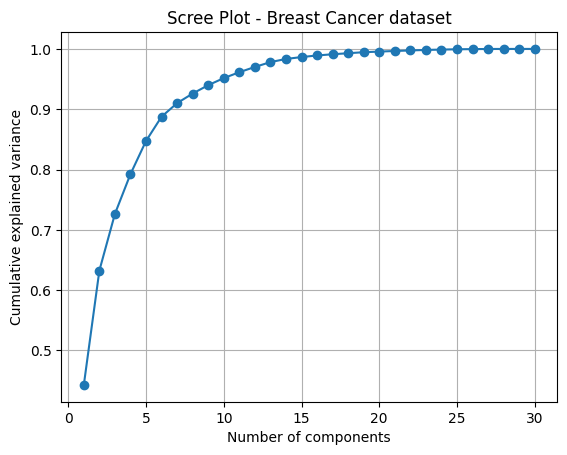

Accuracy (Original, scaled): 0.9708
Accuracy (PCA 95%): 0.9474


In [2]:
# Question 8
# PCA + KNN on Breast Cancer dataset: show explained variance and compare accuracy.
# Paste into one code cell.

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize before PCA
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Fit PCA to see explained variance
pca_full = PCA().fit(X_s)
explained = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree Plot - Breast Cancer dataset")
plt.grid(True)
plt.show()

# Choose components that keep 95% variance
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_s)

# Split original & PCA-reduced data
Xtr, Xte, ytr, yte = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
Xtr_p, Xte_p, ytr_p, yte_p = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# KNN on original standardized data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(Xtr, ytr)
acc_orig = accuracy_score(yte, knn_orig.predict(Xte))

# KNN on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(Xtr_p, ytr_p)
acc_pca = accuracy_score(yte_p, knn_pca.predict(Xte_p))

print("Accuracy (Original, scaled):", round(acc_orig,4))
print("Accuracy (PCA 95%):", round(acc_pca,4))

# Explanation:
# PCA can reduce features while preserving most variance; accuracy may remain similar and computation is faster.

MSE (Euclidean): 3103.7
MSE (Manhattan): 3675.27


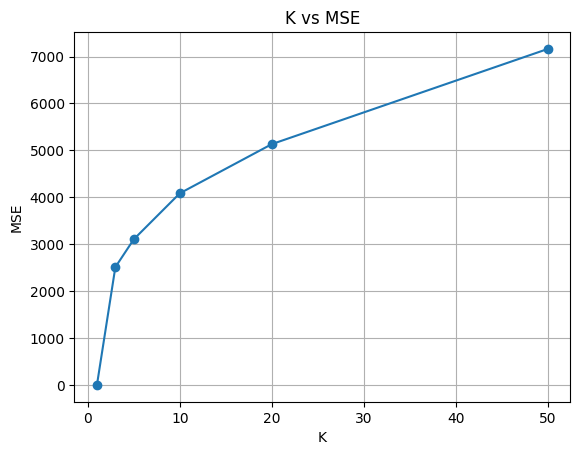

In [3]:
# Question 9
# KNN Regressor: compare Euclidean vs Manhattan on synthetic regression data and show K vs MSE plot.
# Paste into one code cell.

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Train & evaluate with Euclidean and Manhattan
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X, y)
mse_euc = mean_squared_error(y, knn_euc.predict(X))

knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X, y)
mse_man = mean_squared_error(y, knn_man.predict(X))

print("MSE (Euclidean):", round(mse_euc,2))
print("MSE (Manhattan):", round(mse_man,2))

# K vs MSE (shows bias-variance tradeoff)
K_values = [1, 3, 5, 10, 20, 50]
mse_list = []
for k in K_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    mse_list.append(mean_squared_error(y, model.predict(X)))

plt.plot(K_values, mse_list, marker='o')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("K vs MSE")
plt.grid(True)
plt.show()

# Explanation:
# Small K => low bias, high variance. Large K => higher bias, lower variance.

In [5]:
# Question 10 solution – using the diabetes dataset link you provided

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load the dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
print("Loaded data shape:", df.shape)
print(df.head())

# 2) Replace zeros in specific columns with NaN, because zero is not valid in those fields
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols_with_zero:
    df[c] = df[c].replace(0, np.nan)

print("\nMissing values after replacement:")
print(df[cols_with_zero].isnull().sum())

# 3) Impute missing values via median (simple and effective)
for c in cols_with_zero:
    median_val = df[c].median()
    df[c].fillna(median_val, inplace=True)

print("\nMissing values after imputation:")
print(df[cols_with_zero].isnull().sum())

# 4) Prepare features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("\nTrain/Test split shapes:", X_train.shape, X_test.shape)

# 6) Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 7) Try different KNN algorithms and measure time & accuracy
methods = ['brute', 'kd_tree', 'ball_tree']
results = []
print("\nTesting different KNN algorithms:")
for method in methods:
    knn = KNeighborsClassifier(algorithm=method, n_neighbors=5)
    start = time.time()
    knn.fit(X_train_s, y_train)
    y_pred = knn.predict(X_test_s)
    end = time.time()
    acc = accuracy_score(y_test, y_pred)

Loaded data shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after replacement:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Missing values after imputation:


/tmp/ipython-input-2198402293.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(median_val, inplace=True)


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Train/Test split shapes: (537, 8) (231, 8)

Testing different KNN algorithms:
